In [7]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data
df = pd.read_csv('data/fixed_analysis.csv')

# Take a quick look at the data
print(df.head())


   track_id                  track_name  \
0         1                      Comedy   
1         2            Ghost - Acoustic   
2         3              To Begin Again   
3         4  Can't Help Falling In Love   
4         5                     Hold On   

                                          album_name  popularity  duration_ms  \
0                                             Comedy          73       230666   
1                                   Ghost (Acoustic)          55       149610   
2                                     To Begin Again          57       210826   
3  Crazy Rich Asians (Original Motion Picture Sou...          71       201933   
4                                            Hold On          82       198853   

   explicit    tempo track_genre  
0     False   87.917    acoustic  
1     False   77.489    acoustic  
2     False   76.332    acoustic  
3     False  181.740    acoustic  
4     False  119.949    acoustic  


In [ ]:
# Split the data based on explicit and non-explicit tracks
explicit_tracks = df[df['explicit'] == True]
non_explicit_tracks = df[df['explicit'] == False]

# Perform an independent t-test
t_stat, p_value = ttest_ind(explicit_tracks['popularity'], non_explicit_tracks['popularity'])

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference in popularity between explicit and non-explicit tracks.")
else:
    print("No significant difference in popularity between explicit and non-explicit tracks.")

T-statistic: 17.686616647351318
P-value: 6.852056455594636e-70
Significant difference in popularity across tempo categories.


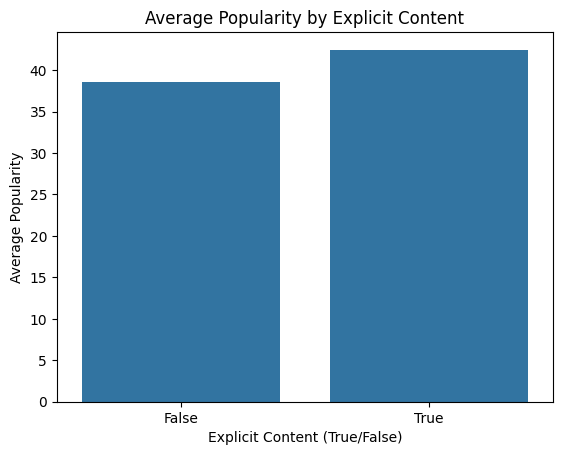

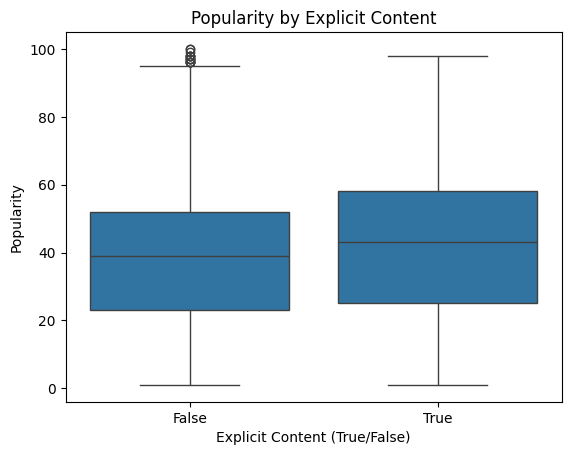

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for average popularity by explicit content
sns.barplot(x='explicit', y='popularity', data=df, errorbar=None)
plt.title('Average Popularity by Explicit Content')
plt.xlabel('Explicit Content (True/False)')
plt.ylabel('Average Popularity')
plt.show()

# Optional: Boxplot for more detail
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Popularity by Explicit Content')
plt.xlabel('Explicit Content (True/False)')
plt.ylabel('Popularity')
plt.show()


In [10]:
from scipy.stats import f_oneway

# Create tempo categories
bins = [0, 60, 120, float('inf')]  # Define the edges of the bins
labels = ['Slow', 'Moderate', 'Fast']  # Define the labels for each bin

# Add a new column for tempo category
df['tempo_category'] = pd.cut(df['tempo'], bins=bins, labels=labels, right=True)

# Preview the data to ensure categories are created correctly
print(df[['tempo', 'tempo_category']].head())

# Group data by tempo category
slow = df[df['tempo_category'] == 'Slow']['popularity']
moderate = df[df['tempo_category'] == 'Moderate']['popularity']
fast = df[df['tempo_category'] == 'Fast']['popularity']

# Perform ANOVA
f_stat, p_value = f_oneway(slow, moderate, fast)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Significant difference in popularity across tempo categories.")
else:
    print("No significant difference in popularity across tempo categories.")



     tempo tempo_category
0   87.917       Moderate
1   77.489       Moderate
2   76.332       Moderate
3  181.740           Fast
4  119.949       Moderate
F-statistic: 34.9287391917529, p-value: 6.856580159566033e-16
Significant difference in popularity across tempo categories.


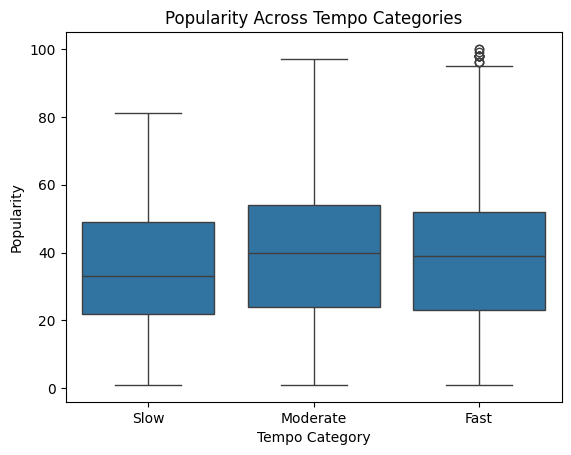

In [11]:
# Boxplot for popularity vs. tempo category
sns.boxplot(x='tempo_category', y='popularity', data=df)
plt.title('Popularity Across Tempo Categories')
plt.xlabel('Tempo Category')
plt.ylabel('Popularity')
plt.show()


In [ ]:
# Create duration categories
df['duration_category'] = pd.cut(df['duration_ms'], bins=[0, 180000, 300000, float('inf')],
                                 labels=['Short', 'Moderate', 'Long'])

# Group data by duration category
short_tracks = df[df['duration_category'] == 'Short']['popularity']
moderate_tracks = df[df['duration_category'] == 'Moderate']['popularity']
long_tracks = df[df['duration_category'] == 'Long']['popularity']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(short_tracks, moderate_tracks, long_tracks)

print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference in popularity across duration categories.")
else:
    print("No significant difference in popularity across duration categories.")

F-statistic: 695.1809730683625
P-value: 1.7083665848018782e-300
Significant difference in popularity across tempo categories.


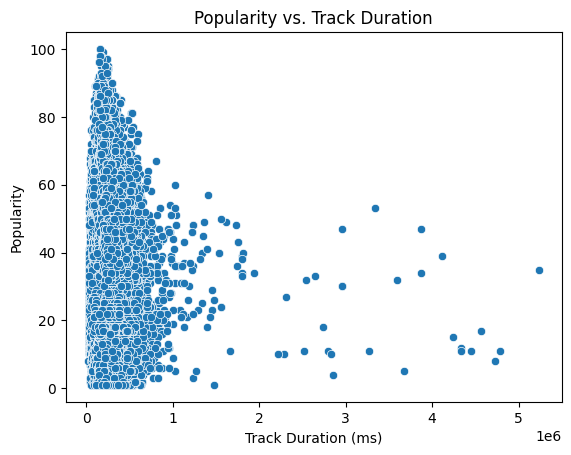

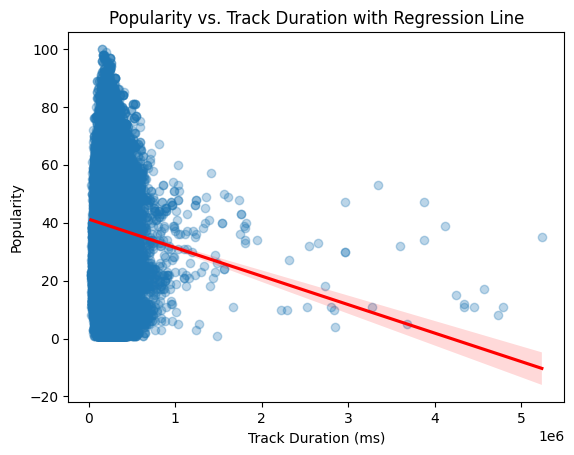

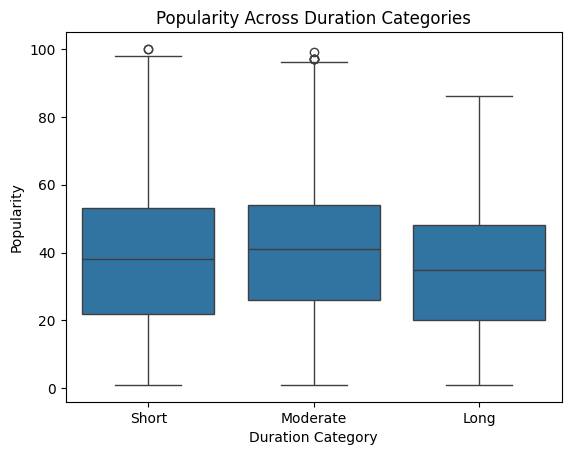

In [13]:
# Scatterplot for popularity vs. duration
sns.scatterplot(x='duration_ms', y='popularity', data=df)
plt.title('Popularity vs. Track Duration')
plt.xlabel('Track Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# Optional: Regression plot to see trends
sns.regplot(x='duration_ms', y='popularity', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Popularity vs. Track Duration with Regression Line')
plt.xlabel('Track Duration (ms)')
plt.ylabel('Popularity')
plt.show()

sns.boxplot(x='duration_category', y='popularity', data=df)
plt.title('Popularity Across Duration Categories')
plt.xlabel('Duration Category')
plt.ylabel('Popularity')
plt.show()


In [ ]:
# Group by genre
genre_groups = df.groupby('track_genre')['popularity'].apply(list)

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*genre_groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference in popularity across track genres.")
else:
    print("No significant difference in popularity across track genres.")


F-statistic: 554.6230929029917
P-value: 0.0
Significant difference in popularity across tempo categories.


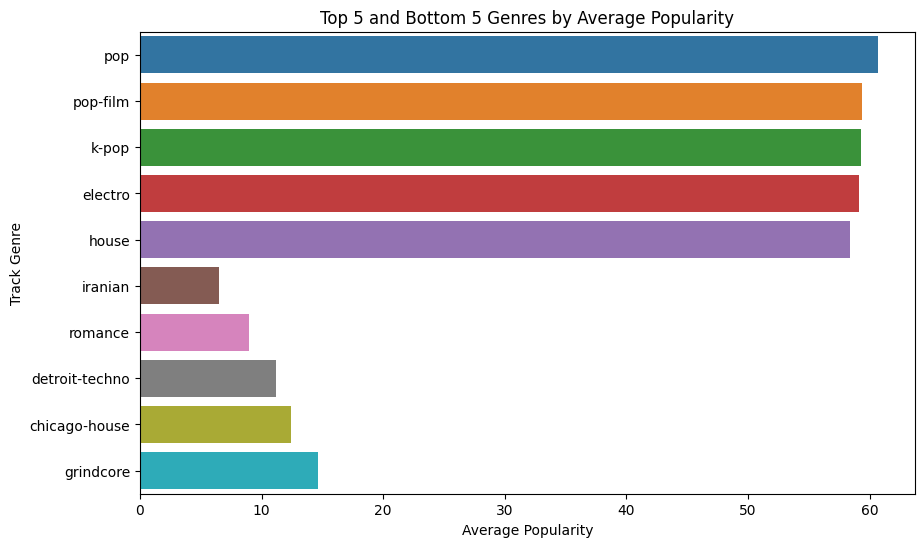

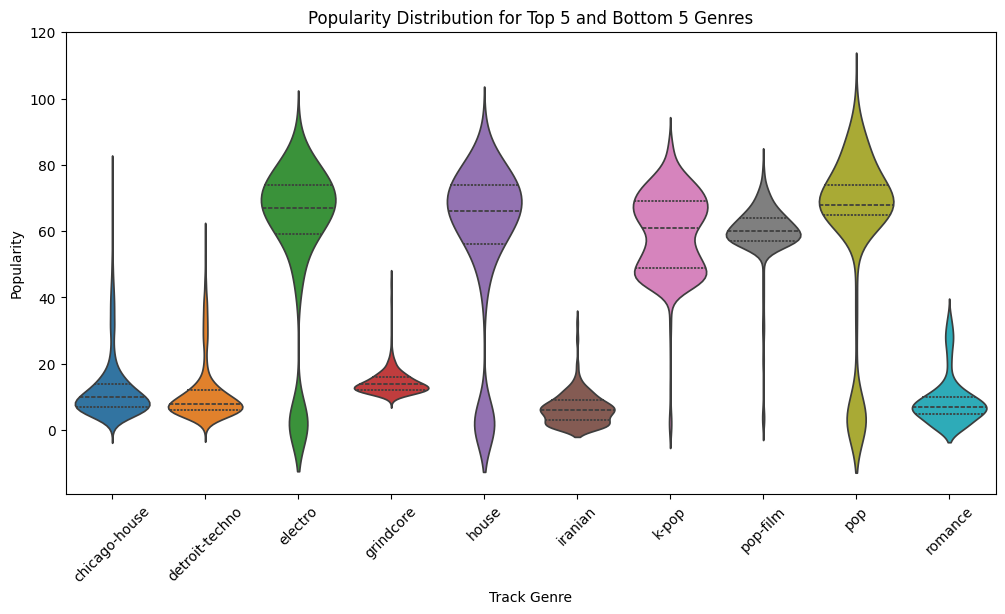

In [15]:
# Step 1: Group by genre and calculate average popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()

# Step 2: Sort and select top 5 and bottom 5 genres
top_genres = genre_popularity.nlargest(5, 'popularity')
bottom_genres = genre_popularity.nsmallest(5, 'popularity')

# Combine top and bottom genres
selected_genres = pd.concat([top_genres, bottom_genres])

# Filter the main dataset
filtered_data = df[df['track_genre'].isin(selected_genres['track_genre'])]

# Step 3: Bar Plot for Average Popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=selected_genres, hue='track_genre')
plt.title('Top 5 and Bottom 5 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Track Genre')
plt.show()

# Step 4: Violin Plot for Popularity Distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='track_genre', y='popularity', data=filtered_data, inner='quartile', hue='track_genre')
plt.title('Popularity Distribution for Top 5 and Bottom 5 Genres')
plt.xlabel('Track Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

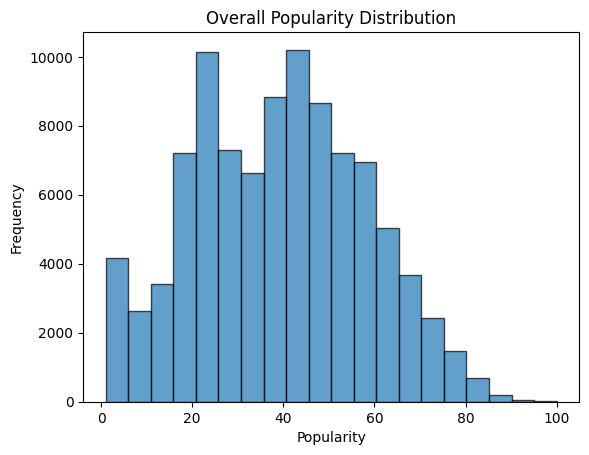

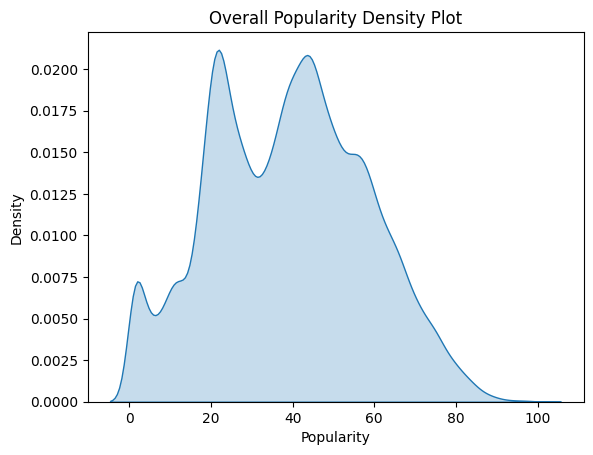

In [16]:
# Histogram for popularity
plt.hist(df['popularity'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Overall Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Density plot for popularity
sns.kdeplot(df['popularity'], fill=True)
plt.title('Overall Popularity Density Plot')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.show()



In [17]:
df.to_csv('updated_music_data.csv', index=False)